## **BANK DATA MODELLING**



In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


In [6]:
from google.colab import files 
uploaded=files.upload()


Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [7]:
import io

In [10]:
df = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.csv']))

In [12]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [14]:
df.shape

(5000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [16]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Droping Irrelevent Columns:
* ID & ZIP Code Doesn't make any impact on Personal Loan

In [17]:

df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


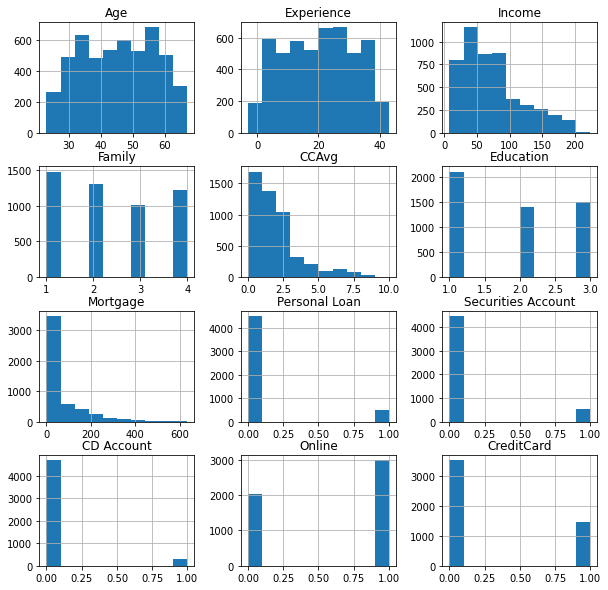

In [19]:
df.hist(figsize=(10,10))
plt.show()

Inference from Histogram
* Dependent Variable is Binary Categorical Variable ( 0 or 1 )
* CD Account, Credit Card, Education, Family, Online, Securities * Account are Categorical Variables but in Encoded Format.

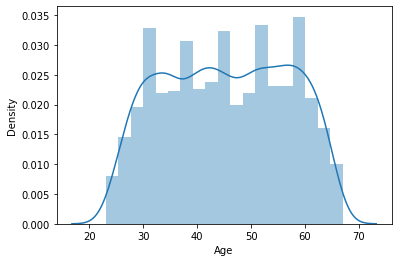

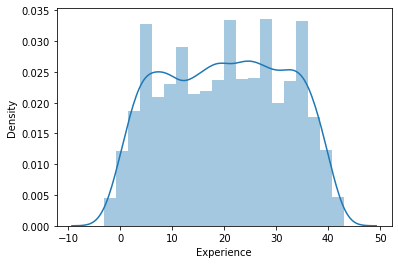

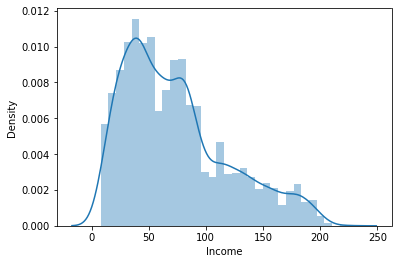

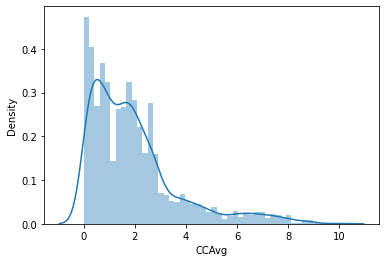

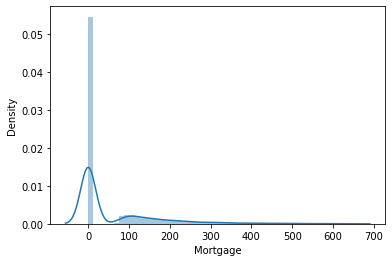

In [20]:
columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in columns:
    sns.distplot(df[col])
    plt.show()


Inference from Distplot:
* Age, Experience, Income, CCAvg is Multimodal and has Positive Skewness (Mean > Median)
* Mortgage is Bimodal and has Positive Skewness( Mean > Median)

**Finding Outliers using Boxplot**

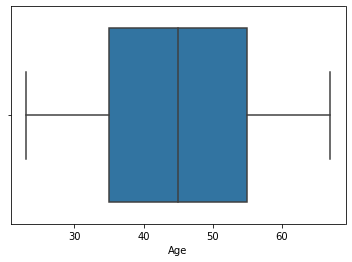

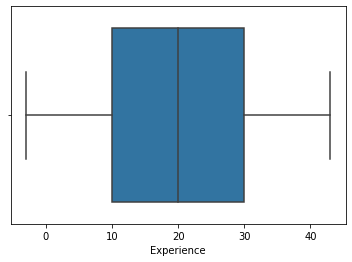

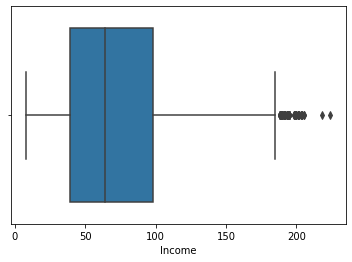

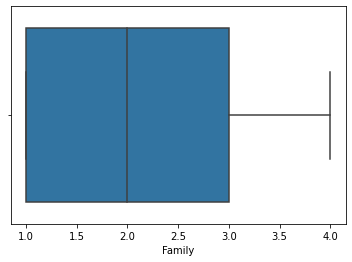

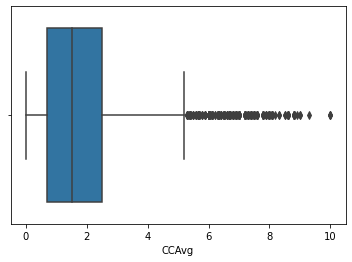

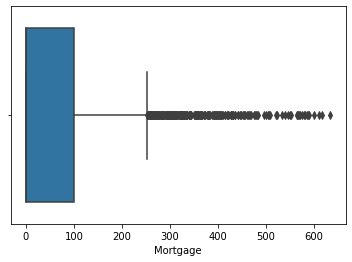

In [21]:
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
for col in columns:
    sns.boxplot(df[col])
    plt.show()

Inference from Boxplot


*  Age, Experience, Family has No Outlier
* Mortgage , CCAvg has Many Outliers
* Income has Moderate Outliers


# **Correlation Matrix**

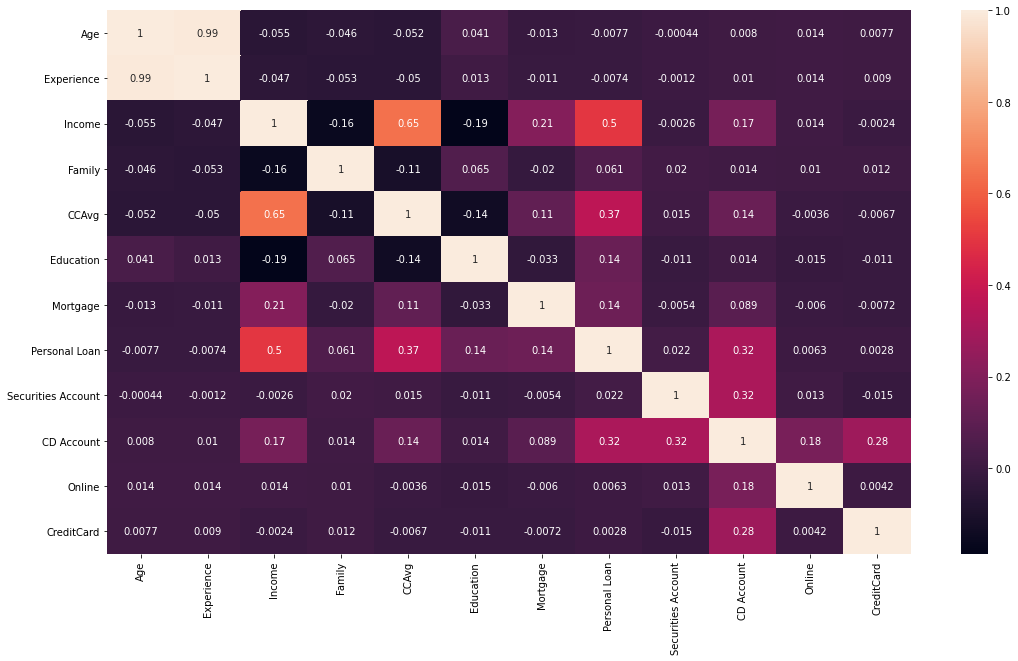

In [22]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True)

Infernece from Correlation Matrix:
1,Personal Loan has Moderate Correlation with CD Account(0.32), CCAvg(0.37), Income(0.5)
2,Personal Loan has Almost No Correlation with other Independent Variables.

Applying Decision Tree
Target Variable is Personal Loan which is Binary Categorical ( 0 or 1 

In [23]:
from sklearn import tree
from sklearn import preprocessing

In [24]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


**Spliting Dataset**

In [25]:
x = df.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [26]:
x.shape

(5000, 11)

In [27]:
y = df.iloc[:, 7:8]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


# **Train the model using Decision Tree**

In [46]:
model = tree.DecisionTreeClassifier(max_depth=22)
model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Predicting Score**

In [47]:
model.score(x,y)

1.0

Seems to be Data is Overfitted ( as accuracy is 100% )

**Applying Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [33]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Checking Score

In [34]:
rf.oob_score_

0.9882

**Finding Most Relevent Column for predicting Personal Loan**

In [35]:
a = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']

for feature, imp in zip(a, rf.feature_importances_):
    print(feature,"\t\t : ",imp);

Age 		 :  0.04451272313888456
Experience 		 :  0.04373277381590742
Income 		 :  0.34326382963056945
Family 		 :  0.0945064376815667
CCAvg 		 :  0.18867737757532302
Education 		 :  0.16351549129698942
Mortgage 		 :  0.04343824733473645
Securities Account 		 :  0.005480443111817242
CD Account 		 :  0.054568452524105644
Online 		 :  0.008416342801264659
CreditCard 		 :  0.009887881088835421


Inference:
Income, CCAvg, Education, Family have value more than 0.05 ie, They are Important feature and affect the prediction of Personal Loan

**Spliting Dataset according to Important Columns**

In [36]:
imp = df[['Income','CCAvg','Education','Family']]
imp.head()

,Income,CCAvg,Education,Family
0,49,1.6,1,4
1,34,1.5,1,3
2,11,1.0,1,1
3,100,2.7,2,1
4,45,1.0,2,4


In [37]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
Fitting Decision Tree

In [38]:
model = tree.DecisionTreeClassifier(max_depth=6)
model.fit(imp,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Representing inTree Structure


In [39]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [40]:

with open('dt1.dot','w') as f:
    f = tree.export_graphviz(model, feature_names=['Income','CCAvg','Education','Family'], out_file=f);

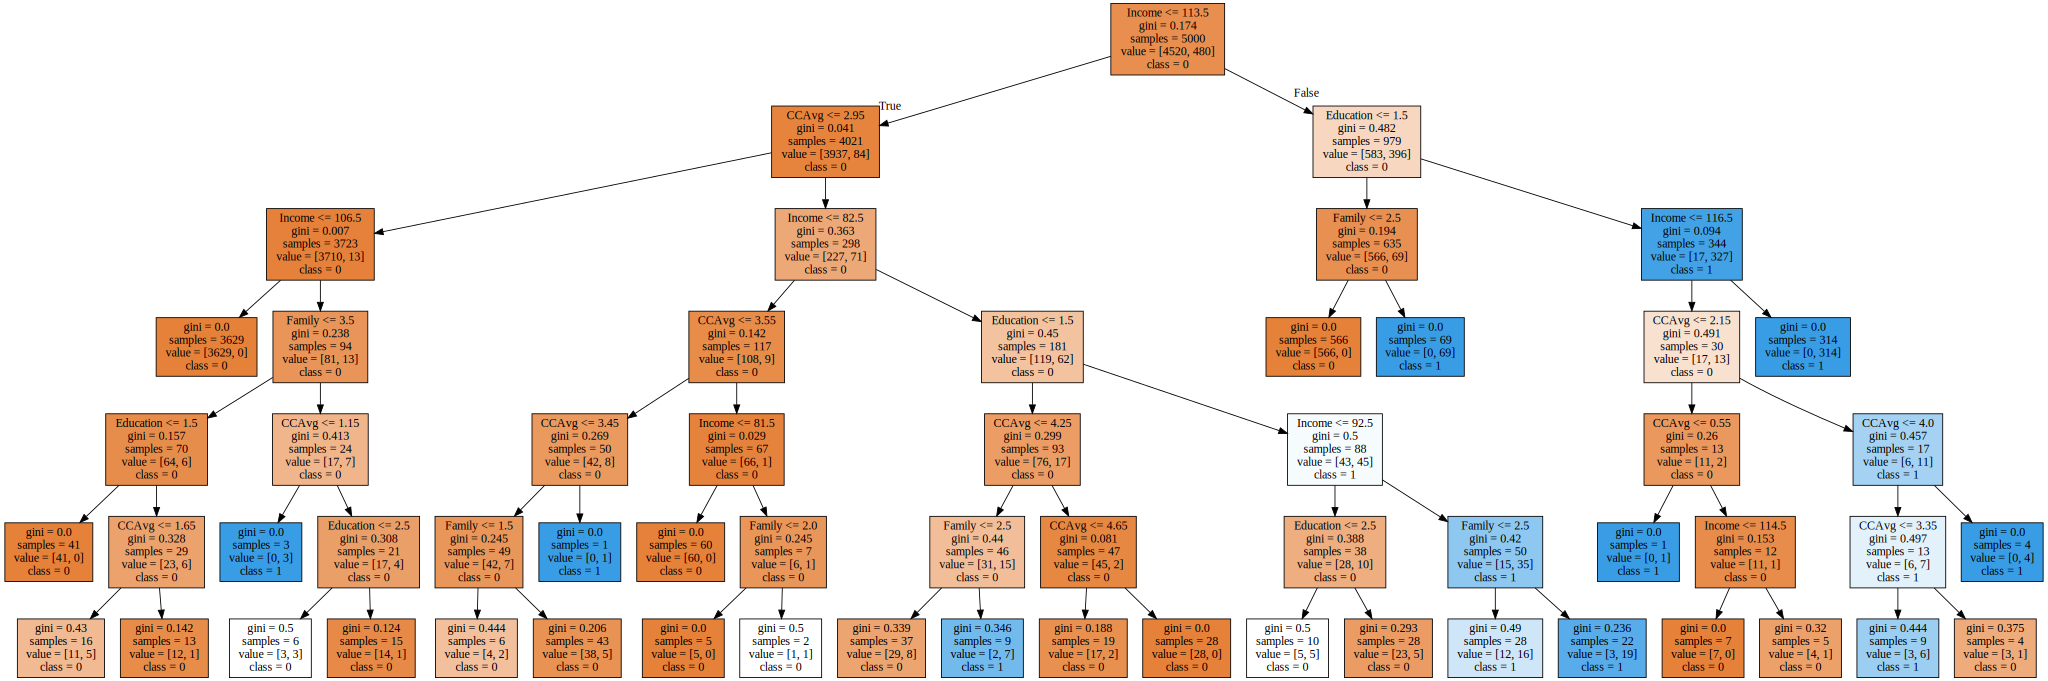

In [41]:
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=['Income','CCAvg','Education','Family'],
                                    class_names=['0','1'] , filled = True))
display(SVG(graph.pipe(format='svg')))


Predicting Score

In [42]:
model.score(imp,y)

0.988

Fitting Random Forest

In [43]:
rf.fit(imp,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

**Accuracy Score**

In [44]:
rf.oob_score_

0.9874

Conclusion:
The Accuracy score remains aproximately same in case of Random Forest while predicting on Important Columns than predicting on All Columns.
The Data is Not overfitted as in the first case of prediction using Decision Tree ( prediction of all columns : accuracy = 100%)